# Import

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns

# Modelling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Setting file path
import os
os.chdir('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw')
df = pd.read_excel("World Bank Data - WDI Internet.xlsx")

# Preprocessing data

In [2]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               50 non-null     object 
 1   Time Code                                                          48 non-null     object 
 2   Country Name                                                       48 non-null     object 
 3   Country Code                                                       48 non-null     object 
 4   Access to electricity (% of population) [EG.ELC.ACCS.ZS]           48 non-null     float64
 5   Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]    48 non-null     object 
 6   Individuals using the Internet (% of population) [IT.NET.USER.ZS]  48 non-null     object 
 7   Mobile cellular subscription

In [3]:
# Drop unnecesary columns and rename them without brackets
df.drop(['Time','Time Code','Country Code','Secure Internet servers (per 1 million people) [IT.NET.SECR.P6]'], axis='columns', inplace=True)
df.rename(columns={'Access to electricity (% of population) [EG.ELC.ACCS.ZS]':'Access to electricity (% of population)',
                  'Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]':'Fixed broadband subscriptions (per 100 people)',
                  'Individuals using the Internet (% of population) [IT.NET.USER.ZS]':'Individuals using the Internet (% of population)',
                  'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]':'Mobile cellular subscriptions (per 100 people)',
                  'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]':'Urban population (% of total population)',
                  },
          inplace=True)
df.head()

,Country Name,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
0,Argentina,100.0,19.636106,..,125.842106,91.991
1,Brazil,99.8,15.592074,73.91244,95.716495,86.824
2,Chile,100.0,18.096566,..,132.18456,87.643
3,Germany,100.0,41.993271,88.134517,128.357032,77.376
4,Austria,100.0,28.129216,87.752205,119.775297,58.515


In [4]:
# Checking NaN
df.isnull().sum()

Country Name                                        5
Access to electricity (% of population)             5
Fixed broadband subscriptions (per 100 people)      5
Individuals using the Internet (% of population)    5
Mobile cellular subscriptions (per 100 people)      5
Urban population (% of total population)            5
dtype: int64

In [5]:
# Importation brought footers
df.tail()

,Country Name,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
48,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filtering those footers
df = df.loc[0:47,]
df.tail()

,Country Name,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
43,India,97.815285,1.401955,41,84.270009,34.472
44,South Africa,85.000000,2.135234,68.2,165.599938,66.856
45,New Zealand,100.000000,..,..,..,86.615
46,Colombia,99.766273,13.805977,65.006901,131.672444,81.104
47,Peru,98.346603,..,59.950501,..,78.099


In [7]:
# Missing values are represented as '..'(str), so I needed to find indexes for its treatment 
def find1():
    for i in df['Fixed broadband subscriptions (per 100 people)']:
        if isinstance(i,str):
            print(i)
            print(df[df['Fixed broadband subscriptions (per 100 people)'] == i].index)
            
def find2():
    for i in df['Individuals using the Internet (% of population)']:
        if isinstance(i,str):
            print(i)
            print(df[df['Individuals using the Internet (% of population)'] == i].index)
            
def find3():
    for i in df['Mobile cellular subscriptions (per 100 people)']:
        if isinstance(i,str):
            print(i)
            print(df[df['Mobile cellular subscriptions (per 100 people)'] == i].index)
            
print(find1())
print(find2())
print(find3())

..
Int64Index([45, 47], dtype='int64')
..
Int64Index([45, 47], dtype='int64')
None
..
Int64Index([0, 2, 31, 34, 45], dtype='int64')
..
Int64Index([0, 2, 31, 34, 45], dtype='int64')
..
Int64Index([0, 2, 31, 34, 45], dtype='int64')
..
Int64Index([0, 2, 31, 34, 45], dtype='int64')
..
Int64Index([0, 2, 31, 34, 45], dtype='int64')
None
..
Int64Index([45, 47], dtype='int64')
..
Int64Index([45, 47], dtype='int64')
None


In [8]:
# Drop records with missing values
df = df.drop([0,2,31,34,45,47])
print(df.shape)

(42, 6)


In [9]:
# Cast object type columns to float type, and check transformations
df[['Fixed broadband subscriptions (per 100 people)','Individuals using the Internet (% of population)','Mobile cellular subscriptions (per 100 people)']] = df[['Fixed broadband subscriptions (per 100 people)','Individuals using the Internet (% of population)','Mobile cellular subscriptions (per 100 people)']].astype(float)
print(type(df['Fixed broadband subscriptions (per 100 people)'][1]))

<class 'numpy.float64'>


In [10]:
# Setting 'Country Name' as DataFrame's Index
df.index = df['Country Name']
df.drop(['Country Name'], axis='columns', inplace=True)
df.head(1)

,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
Country Name,,,,,
Brazil,99.8,15.592074,73.91244,95.716495,86.824


# Explorative Data Analysis

In [11]:
# Descriptive stats
df.describe()

,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,99.580513,31.672939,83.681891,123.111634,75.423762
std,2.329435,11.014297,11.450791,19.253193,13.813269
min,85.000000,1.401955,41.000000,84.270009,34.472000
25%,100.000000,28.001215,76.844946,109.145421,67.105750
50%,100.000000,32.733374,85.957009,122.257773,78.382000
75%,100.000000,40.128775,92.067138,133.762271,84.997500
max,100.000000,46.820499,99.000000,168.820750,98.041000


In [12]:
# Matrix correlation
df.corr()

,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Urban population (% of total population)
Access to electricity (% of population),1.000000,0.491084,0.303389,-0.298556,0.162498
Fixed broadband subscriptions (per 100 people),0.491084,1.000000,0.769934,0.047822,0.510691
Individuals using the Internet (% of population),0.303389,0.769934,1.000000,0.216086,0.620010
Mobile cellular subscriptions (per 100 people),-0.298556,0.047822,0.216086,1.000000,0.136924
Urban population (% of total population),0.162498,0.510691,0.620010,0.136924,1.000000


In [13]:
# Drop Mobile cellular subscriptions feature because lack of correlation
df.drop(['Mobile cellular subscriptions (per 100 people)'], axis='columns', inplace=True)

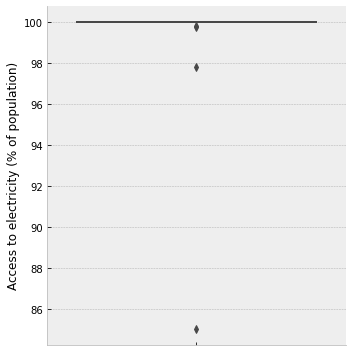

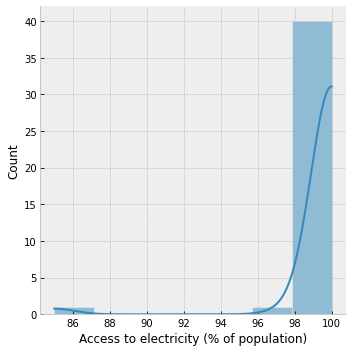

In [14]:
# Exploring distributions for each feature
# Access to electricity (% of population)
print(sns.catplot(data=df, kind='box',y='Access to electricity (% of population)'))
print(sns.displot(data=df, x='Access to electricity (% of population)', kde=True))

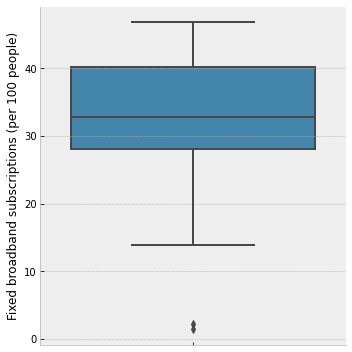

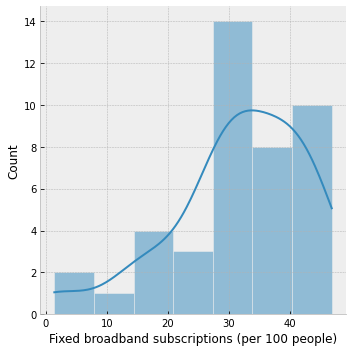

In [15]:
# Fixed broadband subscriptions (per 100 people)
print(sns.catplot(data=df, kind='box',y='Fixed broadband subscriptions (per 100 people)'))
print(sns.displot(data=df, x='Fixed broadband subscriptions (per 100 people)', kde=True))

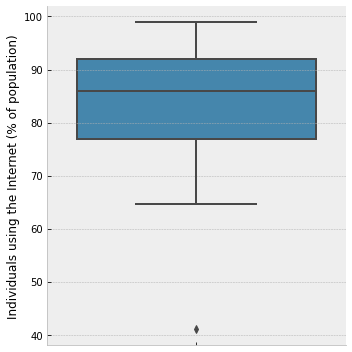

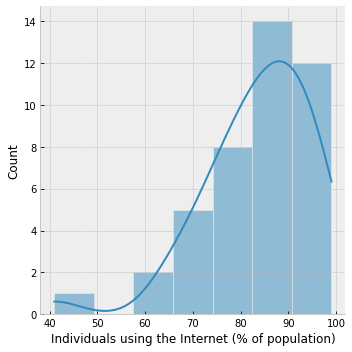

In [16]:
# Individuals using the Internet (% of population)
print(sns.catplot(data=df, kind='box',y='Individuals using the Internet (% of population)'))
print(sns.displot(data=df, x='Individuals using the Internet (% of population)', kde=True))

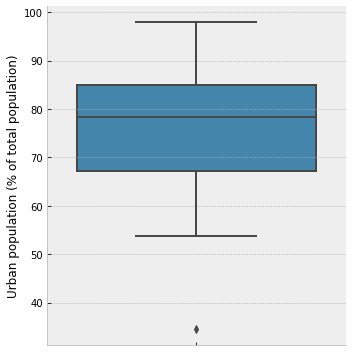

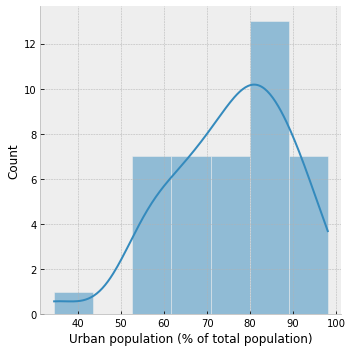

In [17]:
# Urban population (% of total population)
print(sns.catplot(data=df, kind='box',y='Urban population (% of total population)'))
print(sns.displot(data=df, x='Urban population (% of total population)', kde=True))

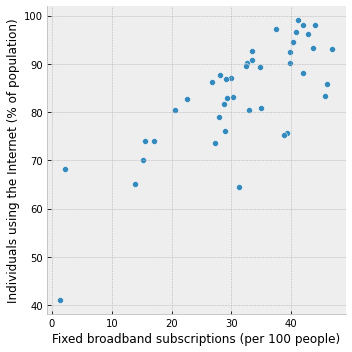

In [18]:
# Correlation between features
sns.relplot(data=df, x='Fixed broadband subscriptions (per 100 people)', y='Individuals using the Internet (% of population)');

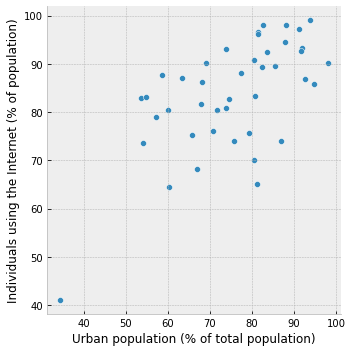

In [19]:
sns.relplot(data=df, x='Urban population (% of total population)', y='Individuals using the Internet (% of population)');

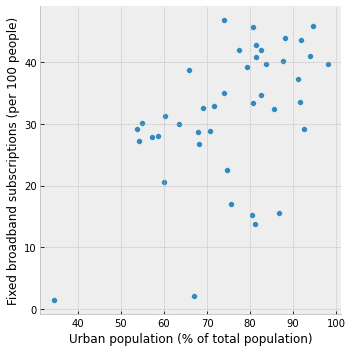

In [20]:
sns.relplot(data=df, x='Urban population (% of total population)', y='Fixed broadband subscriptions (per 100 people)');

# Modelling PCA

In [21]:
# Data scalement
scale = StandardScaler()
scaled_data = scale.fit_transform(df)
len(scaled_data)

42

In [22]:
# Training the model with scaled data
pca = PCA(n_components=4)
pca = pca.fit(scaled_data)

In [23]:
# Creating a DataFrame containing Principal Components and original features
components_list = ['PC1', 'PC2', 'PC3', 'PC4']
pd.DataFrame(
            data= pca.components_,
            columns= df.columns,
            index= components_list
)

,Access to electricity (% of population),Fixed broadband subscriptions (per 100 people),Individuals using the Internet (% of population),Urban population (% of total population)
PC1,-0.356619,-0.573401,-0.566615,-0.472210
PC2,-0.832088,-0.106479,0.214546,0.500262
PC3,0.381462,-0.430884,-0.398987,0.713888
PC4,-0.186922,0.688631,-0.688278,0.130846


In [24]:
# Printing PCA's explained variance ratio. Together, PCA1 and PCA2 explain 84% of variance.
print(pca.explained_variance_ratio_)

[0.62170312 0.22173015 0.10801745 0.04854928]


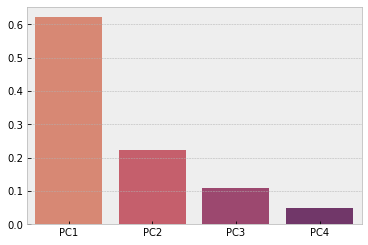

In [27]:
# Plotting PCA's explained variance ratio
sns.barplot(x=components_list, y=pca.explained_variance_ratio_, palette='flare');

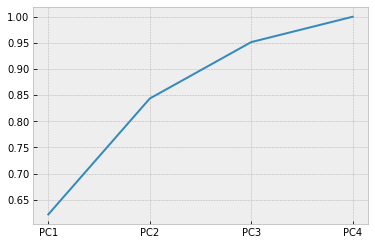

In [28]:
# Plotting cumulative variance explained sum. The graphic shows how much information do we gain adding each Principal Component to the model 
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
sns.lineplot(x=components_list, y=prop_varianza_acum);

In [29]:
# Creating a DataFrame containing Principal Components and records
projections = pca.transform(scaled_data)
projections = pd.DataFrame(
                            projections,
                            columns=components_list,
                            index=df.index
                        )
projections

,PC1,PC2,PC3,PC4
Country Name,,,,
Brazil,0.908137,0.310605,1.613944,-0.331782
Germany,-0.899329,-0.096643,-0.394012,0.366832
Austria,0.502908,-0.659590,-0.818164,-0.668045
Belgium,-1.605099,0.723058,0.698935,0.294853
Croatia,0.990282,-0.869041,-0.572153,-0.163454
Denmark,-1.866011,0.461418,-0.265479,-0.010805
Slovak Republic,0.854387,-0.938953,-0.940428,-0.344530
Slovenia,0.753678,-0.903369,-0.929912,-0.289335
Spain,-0.687035,0.153200,0.021361,-0.302700


# Nonlinearity restriction

In [30]:
# Demonstrating lack of correlation between Principal Components
projections.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-2.634261e-16,7.140366e-17,-4.312562e-16
PC2,-2.634261e-16,1.000000e+00,-2.620795e-16,4.876557e-16
PC3,7.140366e-17,-2.620795e-16,1.000000e+00,-1.391658e-16
PC4,-4.312562e-16,4.876557e-16,-1.391658e-16,1.000000e+00


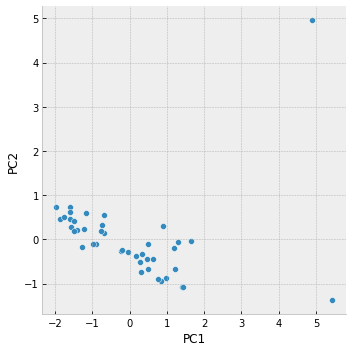

In [31]:
# Visualizing Principal Components which explain 84% of variance
sns.relplot(data=projections, x='PC1', y='PC2');

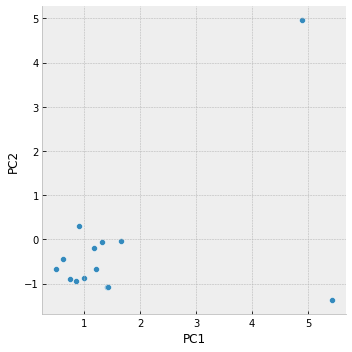

In [32]:
sns.relplot(data=projections[projections.PC1>0.5], x='PC1', y='PC2');

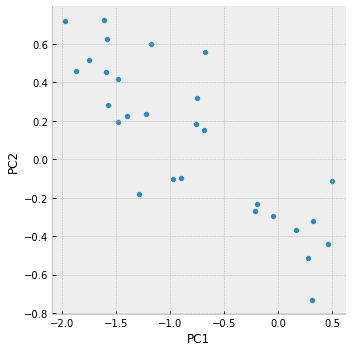

In [33]:
sns.relplot(data=projections[projections.PC1<0.5], x='PC1', y='PC2');